In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [2]:
import geopandas as gpd
import difflib

In [3]:
# %timeit sirve para evaluar el tiempo de ejecucion
df = pd.read_csv('Entrenamieto_ECI_2020.csv')
df.head(30)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,28,USD,"14,838,277.50",USD,"14,838,277.50",Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2017,NaT,7,USD,"2,659,494.60",USD,"2,659,494.60",Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,"50,688.00",USD,"50,688.00",Closed Won,Prod_Category_A_None
8,24353,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,"15,600.00",JPY,"470,400.00",Closed Lost,Prod_Category_A_None
9,24355,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,"4,400.00",JPY,"470,400.00",Closed Lost,Prod_Category_A_None


In [4]:
df.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,"16,947.00","16,947.00","16,947.00","16,947.00","16,947.00","16,947.00","16,947.00","13,738.00","13,738.00","16,947.00","16,947.00","16,888.00","16,947.00"
mean,"17,666.65",0.81,0.58,0.48,0.32,0.00,"5,335.94",7.01,0.43,"2,017.14",2.34,"1,993,659.22","3,224,116.79"
std,"6,940.86",0.39,0.49,0.50,0.47,0.00,"3,324.72",18.86,0.76,0.83,12.17,"18,484,259.88","20,303,604.73"
min,"4,854.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,016.00",0.00,0.00,0.00
25%,"11,953.00",1.00,0.00,0.00,0.00,0.00,"2,448.50",0.36,0.37,"2,016.00",0.00,"26,775.00","85,465.80"
50%,"18,114.00",1.00,1.00,0.00,0.00,0.00,"5,306.00",0.40,0.41,"2,017.00",0.00,"107,250.00","376,067.25"
75%,"23,845.50",1.00,1.00,1.00,1.00,0.00,"7,698.00",0.51,0.48,"2,018.00",1.00,"460,389.83","1,037,450.00"
max,"28,773.00",1.00,1.00,1.00,1.00,0.00,"12,803.00",80.00,67.00,"2,020.00",500.00,"1,320,000,000.00","1,356,338,620.00"


In [5]:
df.groupby('Region')['Territory'].agg(['count']).rename(columns={'count': 'cantidad_territorios'})

,cantidad_territorios
Region,
APAC,3262
Americas,3945
EMEA,4664
Japan,4892
Middle East,184


In [6]:
df['Territory'] = df['Territory'].replace(to_replace='None', value=np.nan).dropna()

In [7]:
df['Territory'] = df['Territory'].replace({'UAE (Dubai)': 'United Arab Emirates', 'China (PRC)': 'China', \
            'Czech Republic': 'Czechia', 'Solomon Islands': 'Solomon Is.', \
            'Bosnia & Herzegovina': 'Bosnia and Herz.', 'Central US': 'United States of America', \
            'Burma': 'Myanmar', 'KSA': 'Saudi Arabia'})

In [15]:
territory = df.Territory.unique()
territory

array([nan, 'NW America', 'India', 'Italy', 'Germany', 'United Kingdom',
       'United Arab Emirates', 'Greece', 'Switzerland', 'Austria',
       'NE America', 'Belgium', 'Japan', 'Tunisia', 'SE America',
       'France', 'Spain', 'Singapore', 'Philippines', 'SW America',
       'Denmark', 'Central America', 'Poland', 'Norway', 'Thailand',
       'Portugal', 'South Korea', 'Australia', 'Netherlands', 'Kuwait',
       'Cambodia', 'Indonesia', 'China', 'Saudi Arabia', 'Ireland',
       'Jordan', 'Cyprus', 'Morocco', 'Turkey', 'Sweden', 'Monaco',
       'Kazakhstan', 'Romania', 'Hungary', 'Taiwan', 'South America',
       'South East Asia', 'Macedonia', 'Ukraine', 'Czechia', 'Belarus',
       'Solomon Is.', 'Vietnam', 'Bosnia and Herz.', 'Kosovo',
       'Luxembourg', 'Bulgaria', 'UAE (Others)', 'Armenia', 'Croatia',
       'Malaysia', 'Georgia', 'Estonia', 'Pakistan', 'Canada',
       'United States of America', 'Carribean', 'Malta', 'New Zealand',
       'Albania', 'Oman', 'Myanmar', '

In [10]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [11]:
world.head(200)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,"8,374.00","MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,"150,600.00","POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.50,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,"1,674,000.00","MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,"18,560,000.00","MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,"101,800.00","POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,"10,610.00","POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,"18,490.00","POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,"43,570.00","POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [12]:
countries = world.name.unique()
countries

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

In [16]:
problemas = []
for item in countries:
    isin = item in territory
    print(item, isin)
    if not isin:
        problemas.append(item)

Fiji False
Tanzania False
W. Sahara False
Canada True
United States of America True
Kazakhstan True
Uzbekistan False
Papua New Guinea False
Indonesia True
Argentina False
Chile False
Dem. Rep. Congo False
Somalia False
Kenya False
Sudan False
Chad False
Haiti False
Dominican Rep. False
Russia False
Bahamas False
Falkland Is. False
Norway True
Greenland False
Fr. S. Antarctic Lands False
Timor-Leste False
South Africa False
Lesotho False
Mexico False
Uruguay False
Brazil False
Bolivia False
Peru False
Colombia False
Panama False
Costa Rica False
Nicaragua False
Honduras False
El Salvador False
Guatemala False
Belize False
Venezuela False
Guyana False
Suriname False
France True
Ecuador False
Puerto Rico False
Jamaica False
Cuba False
Zimbabwe False
Botswana False
Namibia False
Senegal False
Mali False
Mauritania False
Benin False
Niger False
Nigeria False
Cameroon False
Togo False
Ghana False
Côte d'Ivoire False
Guinea False
Guinea-Bissau False
Liberia False
Sierra Leone False
Burkina Fa

In [17]:
for item in territory:
    isin = item in countries
    print(item, isin)
    if not isin:
        problemas.append(item)

nan False
NW America False
India True
Italy True
Germany True
United Kingdom True
United Arab Emirates True
Greece True
Switzerland True
Austria True
NE America False
Belgium True
Japan True
Tunisia True
SE America False
France True
Spain True
Singapore False
Philippines True
SW America False
Denmark True
Central America False
Poland True
Norway True
Thailand True
Portugal True
South Korea True
Australia True
Netherlands True
Kuwait True
Cambodia True
Indonesia True
China True
Saudi Arabia True
Ireland True
Jordan True
Cyprus True
Morocco True
Turkey True
Sweden True
Monaco False
Kazakhstan True
Romania True
Hungary True
Taiwan True
South America False
South East Asia False
Macedonia True
Ukraine True
Czechia True
Belarus True
Solomon Is. True
Vietnam True
Bosnia and Herz. True
Kosovo True
Luxembourg True
Bulgaria True
UAE (Others) False
Armenia True
Croatia True
Malaysia True
Georgia True
Estonia True
Pakistan True
Canada True
United States of America True
Carribean False
Malta False


In [20]:
territorio_cantidad = df.groupby('Territory').agg(cantidad_oportunidades = ('Price','count'))
territorio_cantidad 

,cantidad_oportunidades
Territory,
Albania,2
Armenia,2
Australia,1208
Austria,145
Belarus,4
...,...
Ukraine,5
United Arab Emirates,31
United Kingdom,313


In [25]:
joined = world.set_index('name').join(territorio_cantidad)
joined

,pop_est,continent,iso_a3,gdp_md_est,geometry,cantidad_oportunidades
name,,,,,,
Fiji,920938,Oceania,FJI,"8,374.00","MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",nan
Tanzania,53950935,Africa,TZA,"150,600.00","POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",nan
W. Sahara,603253,Africa,ESH,906.50,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",nan
Canada,35623680,North America,CAN,"1,674,000.00","MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",74.00
United States of America,326625791,North America,USA,"18,560,000.00","MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",254.00
...,...,...,...,...,...,...
Serbia,7111024,Europe,SRB,"101,800.00","POLYGON ((18.82982 45.90887, 18.82984 45.90888...",nan
Montenegro,642550,Europe,MNE,"10,610.00","POLYGON ((20.07070 42.58863, 19.80161 42.50009...",nan
Kosovo,1895250,Europe,-99,"18,490.00","POLYGON ((20.59025 41.85541, 20.52295 42.21787...",2.00


In [26]:
joined.sort_values('cantidad_oportunidades', ascending=False).head(5)

,pop_est,continent,iso_a3,gdp_md_est,geometry,cantidad_oportunidades
name,,,,,,
Germany,80594017,Europe,DEU,"3,979,000.00","POLYGON ((14.11969 53.75703, 14.35332 53.24817...","1,682.00"
Australia,23232413,Oceania,AUS,"1,189,000.00","MULTIPOLYGON (((147.68926 -40.80826, 148.28907...","1,208.00"
India,1281935911,Asia,IND,"8,721,000.00","POLYGON ((97.32711 28.26158, 97.40256 27.88254...",809.00
Japan,126451398,Asia,JPN,"4,932,000.00","MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",681.00
Netherlands,17084719,Europe,NLD,"870,800.00","POLYGON ((6.90514 53.48216, 7.09205 53.14404, ...",533.00


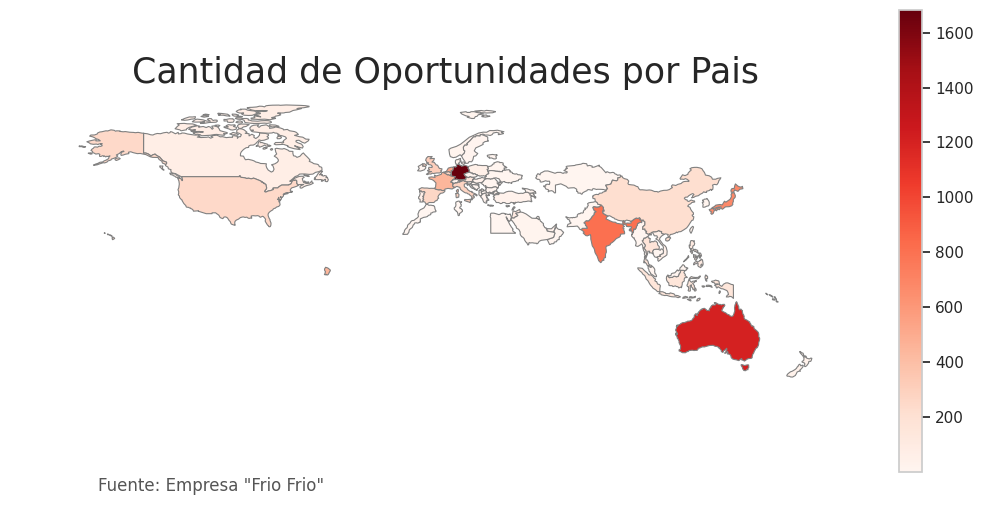

In [85]:
vmin, vmax = joined.cantidad_oportunidades.min(), joined.cantidad_oportunidades.max()

fig, ax = plt.subplots(1, figsize=(13, 6))

joined.plot(column='cantidad_oportunidades', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.5')
ax.axis('off')

ax.set_title('Cantidad de Oportunidades por Pais', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Fuente: Empresa "Frio Frio"',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

fig.savefig('map_cant_oportunidades_por_pais.png', dpi=300)

In [67]:
territory_amount = df.groupby('Territory').agg({'Total_Amount':'mean'})
territory_amount = territory_amount.rename(columns = {'Total_Amount': 'Mean_Total_Amount'})
territory_amount

,Mean_Total_Amount
Territory,
Albania,"1,930,410.00"
Armenia,"9,697,182.00"
Australia,"2,016,479.88"
Austria,"127,969.81"
Belarus,"4,836,626.25"
...,...
Ukraine,"3,264,476.40"
United Arab Emirates,"5,811,978.26"
United Kingdom,"1,080,408.17"


In [68]:
world_amount = world.set_index('name').join(territory_amount)
world_amount

,pop_est,continent,iso_a3,gdp_md_est,geometry,Mean_Total_Amount
name,,,,,,
Fiji,920938,Oceania,FJI,"8,374.00","MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",nan
Tanzania,53950935,Africa,TZA,"150,600.00","POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",nan
W. Sahara,603253,Africa,ESH,906.50,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",nan
Canada,35623680,North America,CAN,"1,674,000.00","MULTIPOLYGON (((-122.84000 49.00000, -122.9742...","612,486.64"
United States of America,326625791,North America,USA,"18,560,000.00","MULTIPOLYGON (((-122.84000 49.00000, -120.0000...","893,863.42"
...,...,...,...,...,...,...
Serbia,7111024,Europe,SRB,"101,800.00","POLYGON ((18.82982 45.90887, 18.82984 45.90888...",nan
Montenegro,642550,Europe,MNE,"10,610.00","POLYGON ((20.07070 42.58863, 19.80161 42.50009...",nan
Kosovo,1895250,Europe,-99,"18,490.00","POLYGON ((20.59025 41.85541, 20.52295 42.21787...","1,400,923.48"


In [72]:
world_amount.sort_values('Mean_Total_Amount', ascending=False).head(5)

,pop_est,continent,iso_a3,gdp_md_est,geometry,Mean_Total_Amount
name,,,,,,
Romania,21529967,Europe,ROU,"441,000.00","POLYGON ((28.23355 45.48828, 28.67978 45.30403...","32,418,990.00"
Kazakhstan,18556698,Asia,KAZ,"460,700.00","POLYGON ((87.35997 49.21498, 86.59878 48.54918...","23,324,239.18"
Japan,126451398,Asia,JPN,"4,932,000.00","MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...","14,113,813.01"
Armenia,3045191,Asia,ARM,"26,300.00","POLYGON ((46.50572 38.77061, 46.14362 38.74120...","9,697,182.00"
Solomon Is.,647581,Oceania,SLB,"1,198.00","MULTIPOLYGON (((162.11902 -10.48272, 162.39865...","8,467,149.60"


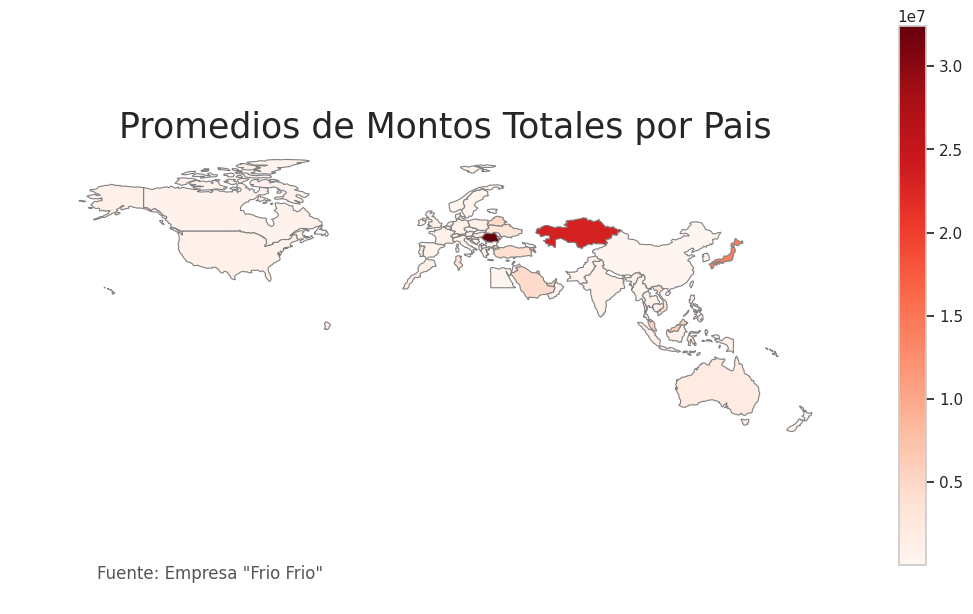

In [106]:
vmin, vmax = world_amount.Mean_Total_Amount.min(), world_amount.Mean_Total_Amount.max()

fig, ax = plt.subplots(1, figsize=(13, 7))

world_amount.plot(column='Mean_Total_Amount', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.5')
ax.axis('off')

ax.set_title('Promedios de Montos Totales por Pais', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Fuente: Empresa "Frio Frio"',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

fig.savefig('map_promedios_montos_por_pais.png', dpi=300)

In [75]:
territory_TRF = df.groupby('Territory').agg({'TRF':'mean'})
territory_TRF = territory_TRF.rename(columns = {'TRF': 'Mean_TRF'})
territory_TRF

,Mean_TRF
Territory,
Albania,5.00
Armenia,27.50
Australia,5.68
Austria,0.18
Belarus,12.50
...,...
Ukraine,9.40
United Arab Emirates,11.84
United Kingdom,2.52


In [76]:
world_TRF = world.set_index('name').join(territory_TRF)
world_TRF

,pop_est,continent,iso_a3,gdp_md_est,geometry,Mean_TRF
name,,,,,,
Fiji,920938,Oceania,FJI,"8,374.00","MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",nan
Tanzania,53950935,Africa,TZA,"150,600.00","POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",nan
W. Sahara,603253,Africa,ESH,906.50,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",nan
Canada,35623680,North America,CAN,"1,674,000.00","MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1.27
United States of America,326625791,North America,USA,"18,560,000.00","MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1.80
...,...,...,...,...,...,...
Serbia,7111024,Europe,SRB,"101,800.00","POLYGON ((18.82982 45.90887, 18.82984 45.90888...",nan
Montenegro,642550,Europe,MNE,"10,610.00","POLYGON ((20.07070 42.58863, 19.80161 42.50009...",nan
Kosovo,1895250,Europe,-99,"18,490.00","POLYGON ((20.59025 41.85541, 20.52295 42.21787...",3.50


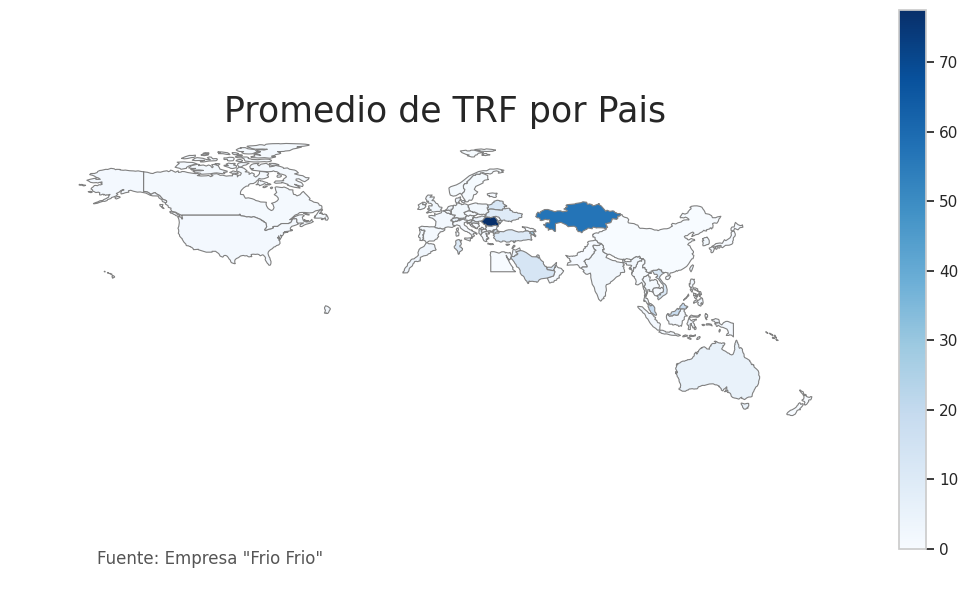

In [84]:
vmin, vmax = world_TRF.Mean_TRF.min(), world_TRF.Mean_TRF.max()

fig, ax = plt.subplots(1, figsize=(13, 7))

world_TRF.plot(column='Mean_TRF', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.5')
ax.axis('off')

ax.set_title('Promedio de TRF por Pais', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Fuente: Empresa "Frio Frio"',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

fig.savefig('map_promedios_TRF_por_pais.png', dpi=300)

In [107]:
territories = df['Territory'].value_counts().sort_values(ascending=False)
territories.head()

Germany       1682
NW America    1568
Australia     1208
India          809
NE America     760
Name: Territory, dtype: int64

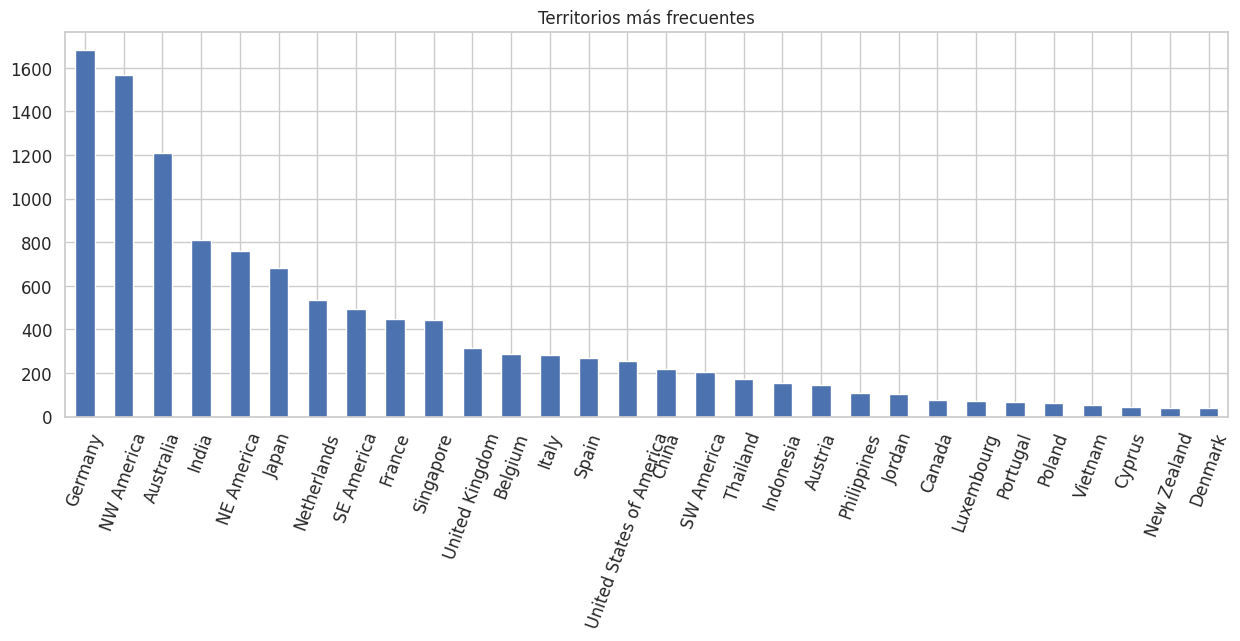

In [109]:
df.Territory.value_counts().head(30).plot(kind='bar', figsize=(15, 5), rot=70, title="Territorios más frecuentes", fontsize =12);

In [117]:
territories = df['Territory'].value_counts().sort_values(ascending=False).head(10).keys().tolist()
territories

['Germany',
 'NW America',
 'Australia',
 'India',
 'NE America',
 'Japan',
 'Netherlands',
 'SE America',
 'France',
 'Singapore']

In [118]:
df_heatmap = df.loc[df['Territory'].isin(territories)]\
    .groupby(['Territory','Pricing, Delivery_Terms_Quote_Appr']).agg({'Territory':'count'})\
    .rename(columns = {'Territory':'cant_territory'})
df_heatmap.head()

cant_territory
Territory Pricing, Delivery_Terms_Quote_Appr                
Australia 0                                              332
          1                                              876
France    0                                              114
          1                                              335
Germany   0                                              384

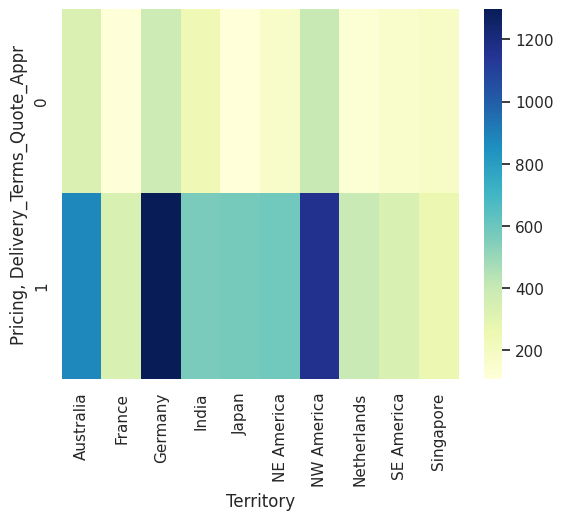

In [127]:
heatmap1_data = pd.pivot_table(df_heatmap, values='cant_territory', 
                     index=['Pricing, Delivery_Terms_Quote_Appr'], 
                     columns='Territory')

sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [129]:
df_heatmap2 = df.loc[df['Territory'].isin(territories)]\
    .groupby(['Territory','Pricing, Delivery_Terms_Approved']).agg({'Territory':'count'})\
    .rename(columns = {'Territory':'cant_territory'})
df_heatmap2.head()

cant_territory
Territory Pricing, Delivery_Terms_Approved                
Australia 0                                            568
          1                                            640
France    0                                            226
          1                                            223
Germany   0                                            735

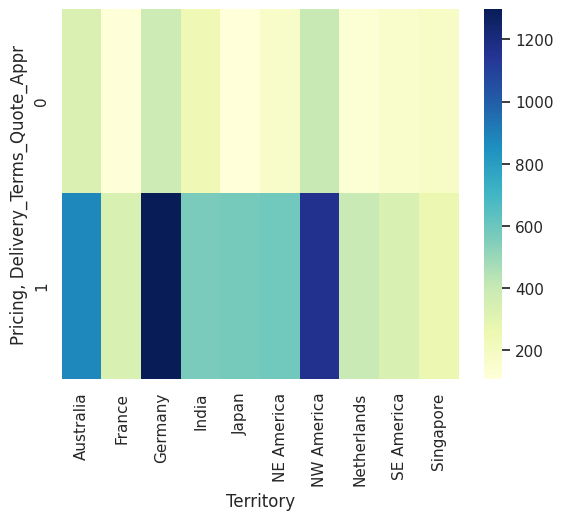

In [132]:
heatmap2_data = pd.pivot_table(df_heatmap2, values='cant_territory', 
                     index=['Pricing, Delivery_Terms_Approved'], 
                     columns='Territory')

sns.heatmap(heatmap1_data, cmap="YlGnBu")